In [35]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

In [36]:
from config import cid
from config import secret
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [37]:
# Using Spotipy library function, to get a list of genres available for the recommendations function.
recommendation_genre_list = sp.recommendation_genre_seeds()

# Creating a list, containing the list of available genres, returned in the 'recommendation_genre_list'
spotify_genre_list = recommendation_genre_list['genres']

# Printing the list, to visually represent genres in scope.
print(spotify_genre_list)

# Determining length of list / how many genres in scope.
print(len(spotify_genre_list))

#pprint(recommendation_genre_list)

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'new-release', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'pop-film', 'post-dubstep', 'power-po

In [38]:
# Creating lists to appeand the requested values returned in the JSON file, from the API call.
tracks_genre=[]
tracks_name = []
tracks_popularity = []

# List to store track ID's
tracks_id = []

# Initialising a counter, as we iterate through the below for loop 
counter = 0

# 3 genres had missing data; this caused issues with 'arrays must all be same length in python using pandas DataFrame', which impacted the ability to turn our lists into a DataFrame.
# we therefore decided to remove the genres with missing data.
spotify_genre_list.remove('funk')
spotify_genre_list.remove('new-release')
spotify_genre_list.remove('pop-film')

# Printing spotify_genre_list to verify reove of 'pop-film'
print(spotify_genre_list)

# For loop to iterate through every genre, API call will return songs (limit=100) for ever genre in the list.
for genre in spotify_genre_list:
    randoms = sp.recommendations(seed_genres=[genre], limit=100)
    
# Inner for loop that will try within a range of 100 to append track genre, name, id and popularity
    for album_ind in range(0,100):
        try:
            tracks_genre.append(randoms['seeds'][0]['id'])
            tracks_name.append(randoms['tracks'][album_ind]['name'])
            tracks_id.append(randoms['tracks'][album_ind]['id'])
            tracks_popularity.append(randoms['tracks'][album_ind]['popularity'])
            print(f"{counter}")
            # Counter adds 1 for every successful for loop iteration
            counter +=1
            # Error handling, that will print the offending genre name and error message if the for loop fails an iteration for a specific genre in scope.
        except IndexError:
            print(genre)
            print("It didn't work!")      

['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient', 'anime', 'black-metal', 'bluegrass', 'blues', 'bossanova', 'brazil', 'breakbeat', 'british', 'cantopop', 'chicago-house', 'children', 'chill', 'classical', 'club', 'comedy', 'country', 'dance', 'dancehall', 'death-metal', 'deep-house', 'detroit-techno', 'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove', 'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'holidays', 'honky-tonk', 'house', 'idm', 'indian', 'indie', 'indie-pop', 'industrial', 'iranian', 'j-dance', 'j-idol', 'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'malay', 'mandopop', 'metal', 'metal-misc', 'metalcore', 'minimal-techno', 'movies', 'mpb', 'new-age', 'opera', 'pagode', 'party', 'philippines-opm', 'piano', 'pop', 'post-dubstep', 'power-pop', 'progressive-house', 'psych-roc

1700
1701
1702
1703
1704
1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499


7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244
7245
7246
7247
7248
7249
7250
7251
7252
7253
7254
7255
7256
7257
7258
7259
7260
7261
7262
7263
7264
7265
7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299


8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950
8951
8952
8953
8954
8955
8956
8957
8958
8959
8960
8961
8962
8963
8964
8965
8966
8967
8968
8969
8970
8971
8972
8973
8974
8975
8976
8977
8978
8979
8980
8981
8982
8983
8984
8985
8986
8987
8988
8989
8990
8991
8992
8993
8994
8995
8996
8997
8998
8999
9000
9001
9002
9003
9004
9005
9006
9007
9008
9009
9010
9011
9012
9013
9014
9015
9016
9017
9018
9019
9020
9021
9022
9023
9024
9025
9026
9027
9028
9029
9030
9031
9032
9033
9034
9035
9036
9037
9038
9039
9040
9041
9042
9043
9044
9045
9046
9047
9048
9049
9050
9051
9052
9053
9054
9055
9056
9057
9058
9059
9060
9061
9062
9063
9064
9065
9066
9067
9068
9069
9070
9071
9072
9073
9074
9075
9076
9077
9078
9079
9080
9081
9082
9083
9084
9085
9086
9087
9088
9089
9090
9091
9092
9093
9094
9095
9096
9097
9098
9099


10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
10568
10569
10570
10571
10572
10573
10574
10575
10576
10577
10578
10579
10580
10581
10582
10583
10584
10585
10586
10587
10588
10589
10590
10591
10592
10593
10594
10595
10596
10597
10598
10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
10660
10661
10662
10663
10664
10665
1066

11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
11955
11956
11957
11958
11959
11960
11961
11962
11963
11964
11965
11966
11967
11968
11969
11970
11971
11972
11973
11974
11975
11976
11977
11978
11979
11980
11981
11982
11983
11984
11985
11986
11987
11988
11989
11990
11991
11992
11993
11994
11995
11996
11997
11998
11999
12000
12001
12002
12003
12004
12005
12006
12007
12008
12009
12010
12011
12012
12013
12014
12015
12016
12017
12018
12019
12020
12021
12022
12023
12024
12025
12026
12027
12028
12029
12030
12031
12032
12033
12034
12035
12036
12037
12038
12039
12040
12041
12042
12043
12044
12045
12046
12047
12048
12049
12050
12051
12052
12053
12054
12055
12056
12057
12058
12059
12060
12061
12062
12063
12064
12065
1206

In [13]:
print(len(tracks_name))
print(len(tracks_genre))
print(len(tracks_popularity))

12300
12300
12300


In [14]:
# Dataframe, comprised of values from lists including Genre, Track Name, Track ID and Popularity.
track_dataframe = pd.DataFrame({'Genre':tracks_genre,'Track Name' : tracks_name, 'Track ID' : tracks_id, 'Popularity' : tracks_popularity})

# Also adding column headings, to refernence and populate in next the audio features, for the next API Call.
track_dataframe['Loudness']=""
track_dataframe['Tempo']=""
track_dataframe['Duration_ms']=""
track_dataframe['Energy']=''
track_dataframe['Key']=''
track_dataframe['Instrumentalness']=''
track_dataframe['Speechiness']=''
track_dataframe['Valence']=''
track_dataframe['Danceability']=''
track_dataframe.head()

Genre                            Track Name                Track ID  \
0  acoustic                        Sexual Healing  40kL0rQpgAULbZPHlO4qnS   
1  acoustic  Jar of Hearts (feat. Tiffany Alvord)  2XRlFYDk8WKDVXAn0HPoHq   
2  acoustic                                Winter  4VuHWU01C36BUaN1adNi5M   
3  acoustic                              The Girl  2KHFNeIuubGY26Rkx0vYL0   
4  acoustic                      Gone, Gone, Gone  20S0KRq4z2v2Utym0C246s   

   Popularity Loudness Tempo Duration_ms Energy Key Instrumentalness  \
0          52                                                          
1           0                                                          
2          52                                                          
3           0                                                          
4          45                                                          

  Speechiness Valence Danceability  
0                                   
1                                   
2                                   
3                                   
4

In [15]:
# Initialising counter, for audio features for loop
counter = 0

# Creating lists to appeand the requested values returned in the JSON file, from the API call.
tracks_loudness =[]
tracks_instrumentalness=[]
tracks_speechiness=[]
tracks_tempo=[]
tracks_duration_ms=[]
tracks_energy=[]
tracks_key=[]
tracks_valence=[]
tracks_danceability =[]

# API CALL 2-2
# For loop, to iterate through every track_id and return the below audio features, we will use as the foundation of the analysis and subsequent figures.
for tid in tracks_id:
    features = sp.audio_features(tid)
    tracks_loudness.append(features[0]['loudness'])
    tracks_instrumentalness.append(features[0]['instrumentalness'])
    tracks_speechiness.append(features[0]['speechiness'])
    tracks_tempo.append(features[0]['tempo'])
    tracks_duration_ms.append(features[0]['duration_ms'])
    tracks_energy.append(features[0]['energy'])
    tracks_key.append(features[0]['key'])
    tracks_valence.append(features[0]['valence'])
    tracks_danceability.append(features[0]['danceability'])
#   Adding to the counter, after every iteration of the for loop
    counter +=1
# Printing the counter, to visualise the process of the for loop
    print(f"{counter}")




1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702


5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341


6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980


8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622


10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
1022

11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
1158

In [16]:
# Assigning / adding returned JSON values to columns in the track_dataframe DataFrame.
track_dataframe['Loudness']= tracks_loudness
track_dataframe['Tempo']= tracks_tempo
track_dataframe['Duration_ms']= tracks_duration_ms
track_dataframe['Energy']= tracks_energy
track_dataframe['Key']= tracks_key
track_dataframe['Instrumentalness']= tracks_instrumentalness
track_dataframe['Speechiness']= tracks_speechiness
track_dataframe['Valence']=tracks_valence
track_dataframe['Danceability']=tracks_danceability

# # Setting the Genre as the index
# track_dataframe=track_dataframe.set_index('Genre')
track_dataframe.head()


Genre                            Track Name                Track ID  \
0  acoustic                        Sexual Healing  40kL0rQpgAULbZPHlO4qnS   
1  acoustic  Jar of Hearts (feat. Tiffany Alvord)  2XRlFYDk8WKDVXAn0HPoHq   
2  acoustic                                Winter  4VuHWU01C36BUaN1adNi5M   
3  acoustic                              The Girl  2KHFNeIuubGY26Rkx0vYL0   
4  acoustic                      Gone, Gone, Gone  20S0KRq4z2v2Utym0C246s   

   Popularity  Loudness    Tempo  Duration_ms  Energy  Key  Instrumentalness  \
0          52   -15.689  164.287       323000   0.240   10          0.000000   
1           0    -9.057   74.985       246133   0.253    5          0.000000   
2          52   -15.255  170.275       203773   0.214    4          0.000362   
3           0    -7.591   77.001       362107   0.541   10          0.000044   
4          45    -5.961  118.002       209693   0.642    6          0.000000   

   Speechiness  Valence  Danceability  
0       0.1050    0.497         0.445  
1       0.0326    0.211         0.572  
2       0.0366    0.404         0.258  
3       0.0432    0.175         0.310  
4       0.0380    0.501         0.664

In [17]:
# Removing duplicates, by Track ID, as

cleansed_df = track_dataframe.drop_duplicates(subset='Track ID', keep='first')
cleansed_df.head()

Genre                            Track Name                Track ID  \
0  acoustic                        Sexual Healing  40kL0rQpgAULbZPHlO4qnS   
1  acoustic  Jar of Hearts (feat. Tiffany Alvord)  2XRlFYDk8WKDVXAn0HPoHq   
2  acoustic                                Winter  4VuHWU01C36BUaN1adNi5M   
3  acoustic                              The Girl  2KHFNeIuubGY26Rkx0vYL0   
4  acoustic                      Gone, Gone, Gone  20S0KRq4z2v2Utym0C246s   

   Popularity  Loudness    Tempo  Duration_ms  Energy  Key  Instrumentalness  \
0          52   -15.689  164.287       323000   0.240   10          0.000000   
1           0    -9.057   74.985       246133   0.253    5          0.000000   
2          52   -15.255  170.275       203773   0.214    4          0.000362   
3           0    -7.591   77.001       362107   0.541   10          0.000044   
4          45    -5.961  118.002       209693   0.642    6          0.000000   

   Speechiness  Valence  Danceability  
0       0.1050    0.497         0.445  
1       0.0326    0.211         0.572  
2       0.0366    0.404         0.258  
3       0.0432    0.175         0.310  
4       0.0380    0.501         0.664

In [18]:
# Writing Cleansed DataFrame to a .csv file
cleansed_df.to_csv("cleansed_df.csv")

In [19]:
# Grouping our cleansed Dataframe
grouped_dataframe=cleansed_df.groupby("Genre")
grouped_dataframe.mean()

# Writing a Genre-sorted DataFrame to csv.
audiofeatures_df = grouped_dataframe.mean()
audiofeatures_df.to_csv("audiogeatures_df.csv")

In [20]:
# William Analysis

# Dependencies
import plotly.express as px
from math import pi
import pygal


# List of languages
language_genre_list = ['brazil', 'british', 'cantopop', 'mandopop', 'french', 'german', 'indian', 'iranian', 'malay', 'philippines-opm', 'spanish', 'swedish', 'turkish']

# DataFrame with average values, by genre
language_genre_agg = grouped_dataframe.aggregate(np.mean)

# Filtering on languages, as per above list
language_genre_df = language_genre_agg.filter(language_genre_list, axis=0)
language_genre_df


Popularity  Loudness       Tempo    Duration_ms    Energy  \
Genre                                                                        
brazil            28.420000 -8.661290  128.894290  226852.120000  0.603370   
british           39.102273 -6.880318  121.425977  231503.590909  0.712489   
cantopop          14.300000 -8.598990  119.864260  242535.680000  0.497590   
mandopop          16.410000 -8.375930  129.893070  255373.050000  0.513710   
french            13.551020 -9.908592  121.198704  210348.275510  0.480798   
german            27.043011 -6.354290  119.998871  231724.408602  0.724333   
indian            23.500000 -7.961210  121.292330  314682.730000  0.654520   
iranian           21.434343 -8.758131  126.053465  266396.525253  0.580313   
malay             15.890000 -7.617760  118.544290  262268.340000  0.532980   
philippines-opm   10.420000 -8.716640  120.111320  254478.670000  0.475310   
spanish           36.397727 -5.887136  125.132409  224851.875000  0.721989   
swedish           31.878788 -7.290343  122.604929  231304.616162  0.681859   
turkish           26.932432 -6.771216  119.369838  248682.824324  0.699676   

                      Key  Instrumentalness  Speechiness   Valence  \
Genre                                                                
brazil           5.690000          0.023539     0.056120  0.616890   
british          5.238636          0.069812     0.057957  0.565009   
cantopop         5.330000          0.006968     0.042326  0.412373   
mandopop         5.280000          0.011410     0.038249  0.374453   
french           5.530612          0.065634     0.075964  0.541735   
german           4.881720          0.007933     0.085570  0.586152   
indian           5.270000          0.025288     0.069315  0.581686   
iranian          5.656566          0.001790     0.077421  0.593281   
malay            4.750000          0.023153     0.035348  0.408999   
philippines-opm  4.890000          0.017524     0.040426  0.333065   
spanish          6.352273          0.015947     0.057260  0.717957   
swedish          5.575758          0.010671     0.076276  0.603384   
turkish          5.391892          0.001686     0.061207  0.584216   

                 Danceability  
Genre                          
brazil               0.599740  
british              0.562920  
cantopop             0.585440  
mandopop             0.542970  
french               0.557347  
german               0.656817  
indian               0.626300  
iranian              0.569465  
malay                0.500870  
philippines-opm      0.490400  
spanish              0.663955  
swedish              0.589242  
turkish              0.636243

In [21]:
# Turning Valence and Energy (measurement scale = 0.0 - 1.0) into percentages, by multiplying by 100
language_genre_df["Energy"] = language_genre_df["Energy"] * 100
language_genre_df["Valence"] = language_genre_df["Valence"] * 100
language_genre_df["Danceability"] = language_genre_df["Danceability"] * 100
language_genre_df["Speechiness"] = language_genre_df["Speechiness"] * 100

language_genre_df

# # Empty list, to store Popularity, Energy and Valence values for each Genre in language_genre_df
genre_values = []

# For loop, that iterates through Popularity, Energy and Valence rows and appends values to the genre_values list
for index, rows in language_genre_df.iterrows():
    my_list = [rows.Popularity, rows.Energy, rows.Valence, rows.Danceability, rows.Speechiness]
    genre_values.append(my_list)   

# # rounding values in nested lists to 2-decimal places.
genre_values = np.round(genre_values, 2)
genre_values

array([[28.42, 60.34, 61.69, 59.97,  5.61],
       [39.1 , 71.25, 56.5 , 56.29,  5.8 ],
       [14.3 , 49.76, 41.24, 58.54,  4.23],
       [16.41, 51.37, 37.45, 54.3 ,  3.82],
       [13.55, 48.08, 54.17, 55.73,  7.6 ],
       [27.04, 72.43, 58.62, 65.68,  8.56],
       [23.5 , 65.45, 58.17, 62.63,  6.93],
       [21.43, 58.03, 59.33, 56.95,  7.74],
       [15.89, 53.3 , 40.9 , 50.09,  3.53],
       [10.42, 47.53, 33.31, 49.04,  4.04],
       [36.4 , 72.2 , 71.8 , 66.4 ,  5.73],
       [31.88, 68.19, 60.34, 58.92,  7.63],
       [26.93, 69.97, 58.42, 63.62,  6.12]])

In [22]:
# Audio features list
audio_features = ["Popularity", "Energy", "Valence", "Danceability", "Speechiness"]

# List of all genre values for Popularity, Energy, Valence

# OTHER bucket genres
brazil_values = [28.42, 60.34, 61.69, 59.97, 5.61]
turkish = [26.61, 70.23, 59.10, 62.56, 6.58]
british_values = [39.99, 73.01, 56.9, 54.32, 5.26]

In [23]:
# Fig w-1 - European Audio Features

# EUROPEAN genres, containing values
french = [14.26, 53.23, 56.05, 56.66, 6.88]
# Closing each radar shape by contatinating the first and last element of each shape.
french = np.concatenate((french,[french[0]]))

german = [26.65, 71.64, 58.68, 64.01, 9.46] 
# Closing each radar shape by contatinating the first and last element of each shape.
german = np.concatenate((german,[german[0]]))

spanish = [42.25, 72.19, 66.47, 65.83, 5.30]
# Closing each radar shape by contatinating the first and last element of each shape.
spanish = np.concatenate((spanish,[spanish[0]]))

swedish = [31.53, 65.55, 57.13, 55.68, 8.01]
# Closing each radar shape by contatinating the first and last element of each shape.
swedish = np.concatenate((swedish,[swedish[0]]))

In [24]:
# Calculating evenly-spaced angel coordinates. Using radians for the polar plot with 2 multipled by np pie
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(french))
print(2*np.pi, 'radians=', 2*np.degrees(2*np.pi), 'degrees')

6.283185307179586 radians= 720.0 degrees


In [25]:
print('radians', label_placement)
print('degrees', np.degrees(label_placement))

radians [0.         1.25663706 2.51327412 3.76991118 5.02654825 6.28318531]
degrees [  0.  72. 144. 216. 288. 360.]


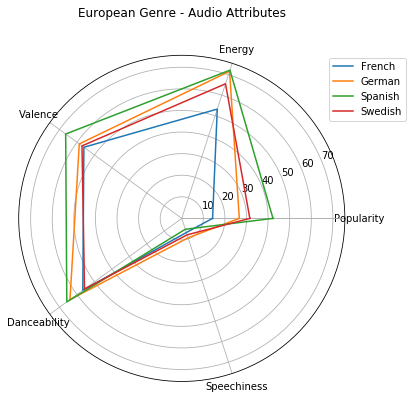

In [26]:
plt.figure(figsize = (6,6))

plt.subplot(polar=True)
plt.plot(label_placement, french)
plt.plot(label_placement, german)
plt.plot(label_placement, spanish)
plt.plot(label_placement, swedish)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels =audio_features)
plt.title('European Genre - Audio Attributes', y=1.1)
plt.legend(labels=['French', 'German', 'Spanish', 'Swedish'], loc=(0.95, 0.8))
plt.savefig(f"outputs/European_Genre_Audio_Attributes.png")

In [27]:
# fig w-2 - # Fig w-1 - Asian Audio Features

# Asian Genres lists, containing values
cantopop = [14.23, 49.55, 43.11, 57.97, 4.06]
# Closing each radar shape by contatinating the first and last element of each shape.
cantopop = np.concatenate((cantopop,[cantopop[0]]))

mandopop = [15.17, 48.86, 34.91, 54.73, 3.75]
# Closing each radar shape by contatinating the first and last element of each shape.
mandopop = np.concatenate((mandopop,[mandopop[0]]))

indian = [26.8 , 66.67, 59.07, 62.05, 6.85]
# Closing each radar shape by contatinating the first and last element of each shape.
indian = np.concatenate((indian,[indian[0]]))

iranian = [21.24, 58.50, 60.02, 56.27, 7.12]
# Closing each radar shape by contatinating the first and last element of each shape.
iranian = np.concatenate((iranian,[iranian[0]]))

malay = [16.61, 55.03, 43.90, 50.84, 3.57]
# Closing each radar shape by contatinating the first and last element of each shape.
malay = np.concatenate((malay,[malay[0]]))

phillippines_opm = [9.95, 45.64, 31.98, 48.08, 3.89]
# Closing each radar shape by contatinating the first and last element of each shape.
phillippines_opm = np.concatenate((phillippines_opm,[phillippines_opm[0]]))

In [28]:
label_placement = np.linspace(start=0, stop=2*np.pi, num=len(cantopop))
print(2*np.pi, 'radians=', 2*np.degrees(2*np.pi), 'degrees')

6.283185307179586 radians= 720.0 degrees


In [29]:
print('radians', label_placement)
print('degrees', np.degrees(label_placement))

radians [0.         1.25663706 2.51327412 3.76991118 5.02654825 6.28318531]
degrees [  0.  72. 144. 216. 288. 360.]


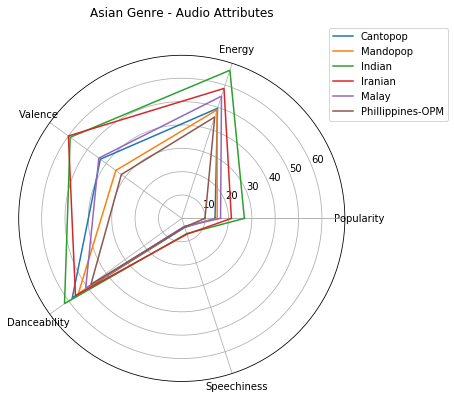

In [30]:
plt.figure(figsize = (6,6))

plt.subplot(polar=True)
plt.plot(label_placement, cantopop)
plt.plot(label_placement, mandopop)
plt.plot(label_placement, indian)
plt.plot(label_placement, iranian)
plt.plot(label_placement, malay)
plt.plot(label_placement, phillippines_opm)
lines, labels = plt.thetagrids(np.degrees(label_placement), labels =audio_features)
plt.title('Asian Genre - Audio Attributes', y=1.1)
plt.legend(labels=['Cantopop', 'Mandopop', 'Indian', 'Iranian', 'Malay', 'Phillippines-OPM'], loc=(0.95, 0.8))
plt.savefig(f"outputs/Asian_Genre_Audio_Attributes.png")